In [1]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import the needed libraries

import sklearn
from numpy import mean
from numpy import std
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
from matplotlib import pyplot as plt

In [31]:
# define the random dataset

X, y = make_classification(
    n_samples=1000, #  number of samples, default is 100
    n_features=20, # total number of features, default is 20
    n_informative=10, # number of informative features, default is 2
    n_redundant=10, # number of redundant features, default is 2
    random_state=7) 

# summarize the dataset

print(X.shape, y.shape)

(1000, 20) (1000,)


In [205]:
# select so many features in PCA, so that we explain 70-80% information to avoid overfitting
# only 4 or 5 features out of 20 should explain 77.5 - 84% information 

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

pca = PCA()
pca.fit(X)
PCA()
print(pca.explained_variance_) # total variance explained by model, can be higher than 1, higher the better model
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_) # singular values are related to the eigenvalues of covariance matrix via λi=s2i/(n−1)

[6.11209596e+01 3.44345008e+01 2.52107480e+01 1.81653612e+01
 1.16769951e+01 9.89207158e+00 7.49852815e+00 4.74980726e+00
 4.00581133e+00 2.53871567e+00 1.68055924e-30 1.52100900e-30
 9.83849396e-31 5.79688578e-31 3.84137315e-31 3.77585296e-31
 1.99841578e-31 1.69839711e-31 1.26769671e-31 8.26394006e-32]
[3.40898918e-01 1.92056606e-01 1.40611613e-01 1.01316341e-01
 6.51278220e-02 5.51725058e-02 4.18226439e-02 2.64917986e-02
 2.23422007e-02 1.41595523e-02 9.37323023e-33 8.48334721e-33
 5.48736794e-33 3.23318237e-33 2.14250555e-33 2.10596201e-33
 1.11460583e-33 9.47271997e-34 7.07051129e-34 4.60916883e-34]
[0.34089892 0.53295552 0.67356714 0.77488348 0.8400113  0.8951838
 0.93700645 0.96349825 0.98584045 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
[2.47102891e+02 1.85472549e+02 1.58699519e+02 1.34711528e+02
 1.08006102e+02 9.94091521e+01 8.65507344e+01 6.88843774e+01
 6.32598255e+01 5.03604702e+01 4.09741221e-14 3.89806105e-

In [166]:
# select only 4 features for PCA
# only 4 features are generated out of 20 and based on variance ration the first principal component has more impact than second principal component
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

pca4 = PCA(n_components=4, svd_solver ="randomized")
pca4.fit(X)
PCA(n_components=4)
print(pca4.explained_variance_) # total variance explained by model, can be higher than 1, higher the better model
print(pca4.explained_variance_ratio_)
print(pca4.explained_variance_ratio_.cumsum())
print(pca4.singular_values_) # singular values are related to the eigenvalues of covariance matrix via λi=s2i/(n−1)

[61.12095959 34.43450078 25.21074797 18.16536121]
[0.34089892 0.19205661 0.14061161 0.10131634]
[0.34089892 0.53295552 0.67356714 0.77488348]
[247.10289077 185.47254858 158.69951865 134.71152828]


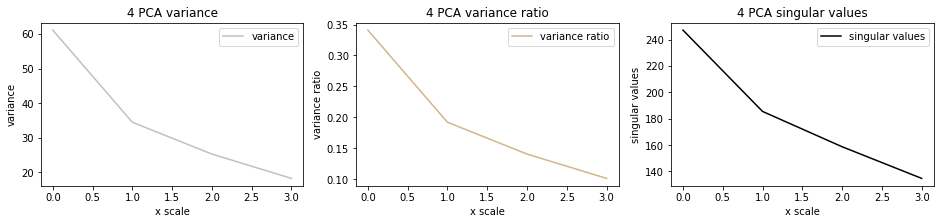

In [167]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

fig = plt.figure(figsize=(16, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(pca4.explained_variance_, label='variance', color="silver")
ax2.plot(pca4.explained_variance_ratio_, label='variance ratio', color="tan")
ax3.plot(pca4.singular_values_, label='singular values', color="black")

ax1.set_xlabel('x scale')
ax1.set_ylabel('variance')
ax1.set_title('4 PCA variance')
ax1.legend()

ax2.set_xlabel('x scale')
ax2.set_ylabel('variance ratio')
ax2.set_title('4 PCA variance ratio')
ax2.legend()

ax3.set_xlabel('x scale')
ax3.set_ylabel('singular values')
ax3.set_title('4 PCA singular values')
ax3.legend()

plt.show()

In [168]:
# mle has selected automatically number of features for our data sample 
# for random dataset mle selected 10, so we'd need about 10 components to retain 90% of the variance 
# for fetch_lfw_people dataset with 2900 features mle does not work well
# cumulative sum - PC1 explains 34%, PC1 and PC2 explain 53%, PC1, PC2 and PC3 explain 67%, etc all the way up to 100% explained by all 10 principal components.
# mle is overfitting

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)


pcamle = PCA(n_components = "mle", svd_solver ="full") # mle stands for automatic dimensionality choice, pca is used as step later
pcamle.fit_transform(X)
print(pcamle.explained_variance_)
print(pcamle.explained_variance_ratio_)
print(pcamle.explained_variance_ratio_.cumsum())
print(pcamle.singular_values_)

[61.12095959 34.43450078 25.21074797 18.16536121 11.67699506  9.89207158
  7.49852815  4.74980726  4.00581133  2.53871567]
[0.34089892 0.19205661 0.14061161 0.10131634 0.06512782 0.05517251
 0.04182264 0.0264918  0.0223422  0.01415955]
[0.34089892 0.53295552 0.67356714 0.77488348 0.8400113  0.8951838
 0.93700645 0.96349825 0.98584045 1.        ]
[247.10289077 185.47254858 158.69951865 134.71152828 108.00610197
  99.40915205  86.55073436  68.88437744  63.25982547  50.3604702 ]


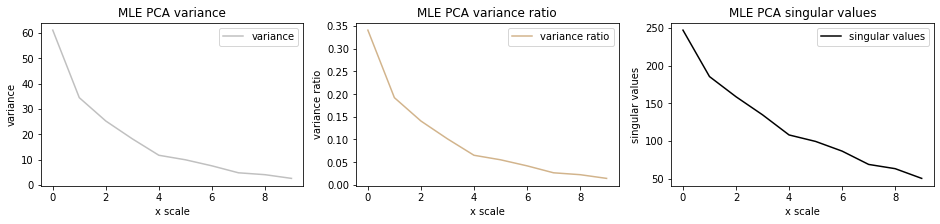

In [185]:
# define dataset

# X, y = sklearn.datasets.fetch_lfw_people(return_X_y=True)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

fig = plt.figure(figsize=(16, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(pcamle.explained_variance_, label='variance', color="silver")
ax2.plot(pcamle.explained_variance_ratio_, label='variance ratio', color="tan")
ax3.plot(pcamle.singular_values_, label='singular values', color="black")

ax1.set_xlabel('x scale')
ax1.set_ylabel('variance')
ax1.set_title('MLE PCA variance')
ax1.legend()

ax2.set_xlabel('x scale')
ax2.set_ylabel('variance ratio')
ax2.set_title('MLE PCA variance ratio')
ax2.legend()

ax3.set_xlabel('x scale')
ax3.set_ylabel('singular values')
ax3.set_title('MLE PCA singular values')
ax3.legend()

plt.show()

In [204]:
# print eigenvectors, higher the number, higher the importance
print(abs( pca4.components_ ))

[[0.05066492 0.14766907 0.0216404  0.47059144 0.0386959  0.32999151
  0.23428329 0.07611129 0.07248979 0.08817398 0.10508724 0.28333493
  0.12270876 0.19630055 0.33842973 0.49929036 0.0575997  0.14178668
  0.06617724 0.18182412]
 [0.21796152 0.24837002 0.10364418 0.01506274 0.28600193 0.22637386
  0.36603144 0.07988956 0.46225593 0.09073186 0.10167718 0.17383909
  0.05715123 0.03754531 0.34564107 0.09525623 0.29350637 0.33008571
  0.0913769  0.08539152]
 [0.14100258 0.34592716 0.07194228 0.16637327 0.26843155 0.51150323
  0.02110241 0.29786047 0.17317317 0.1937421  0.07557368 0.41352009
  0.14974289 0.08390217 0.14213589 0.26582719 0.12408727 0.0150859
  0.14563915 0.05778662]
 [0.29958699 0.2477217  0.35872884 0.39805516 0.06847234 0.12925803
  0.28858058 0.16487363 0.38942807 0.10069735 0.21181154 0.17557357
  0.06576801 0.05834443 0.29852764 0.10263667 0.05107161 0.16897979
  0.14764298 0.17905667]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


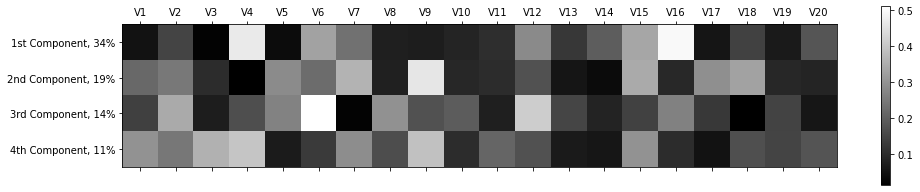

In [201]:
# feature 4 and feature 16 is the most important for PCA1
# feature 9 is the most important for PCA2
# feature 6 is the most important for PCA3
plt.matshow(abs(pca4.components_),cmap='gray')
plt.yticks([0,1,2,3],['1st Component, 34%','2nd Component, 19%','3rd Component, 14%','4th Component, 11%'],fontsize=10)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
           ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18', 'V19','V20'],fontsize=10)
plt.colorbar()
plt.tight_layout()
plt.show()

In [202]:
# PCA and logistic regression
# the total variance explained by all components should be between 70% to 80% variance, we use 4 features out of 20

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# do PCA analysis and logistic regression as input for model 
steps = [('pca4', PCA(n_components=4)), ('m', LogisticRegression())] # set up number of components, m stands for multinomial logistic regression

# define the model
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.018)


In [172]:
# Logistic regression
# the total variance explained by all components should be between 70% to 80% variance

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the model
model = LogisticRegression()

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [203]:
# SVD and logistic regression
# the total variance explained by all components should be between 70% to 80% variance

from sklearn.decomposition import TruncatedSVD

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [146]:
# LDA and logistic regression
# the total variance explained by all components should be between 70% to 80% variance

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.825 (0.034)


In [148]:
# Isomap and logistic regression
# the total variance explained by all components should be between 70% to 80% variance

from sklearn.manifold import Isomap

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline
steps = [('iso', Isomap(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.029)


In [149]:
# LLE and logistic regression
# the total variance explained by all components should be between 70% to 80% variance

from sklearn.manifold import LocallyLinearEmbedding

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.028)


In [157]:
# LLE and logistic regression
# the total variance explained by all components should be between 70% to 80% variance

from sklearn.manifold import LocallyLinearEmbedding

# define dataset

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline

steps = [('lle', LocallyLinearEmbedding(n_components=5, method='modified', n_neighbors=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.848 (0.037)


In [151]:
# Hessian and logistic regression
# the total variance explained by all components should be between 70% to 80% variance

from sklearn.manifold import LocallyLinearEmbedding

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)

# define the pipeline
steps = [('hessian', LocallyLinearEmbedding(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.028)
